In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

In [82]:
data = pd.read_csv("https://raw.githubusercontent.com/Toshani/Breast-Cancer-Prediction-Data-Analytics/main/data.csv")

In [83]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [84]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [85]:
len(data)

569

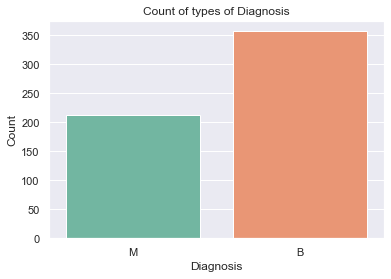

In [86]:
import seaborn as sns
sns.countplot(x="diagnosis", data=data, palette="Set2")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.title("Count of types of Diagnosis")
plt.show()

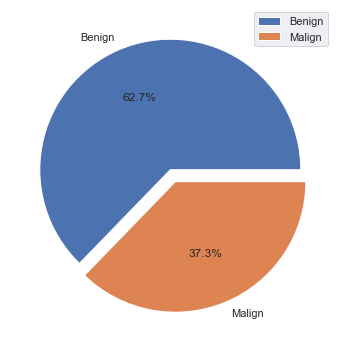

In [87]:
plt.figure(figsize=(8, 6))
labels=['Benign','Malign']
plt.pie(data["diagnosis"].value_counts(),explode=(0,0.1),labels=labels,autopct='%1.1f%%')
plt.legend()

<AxesSubplot:>

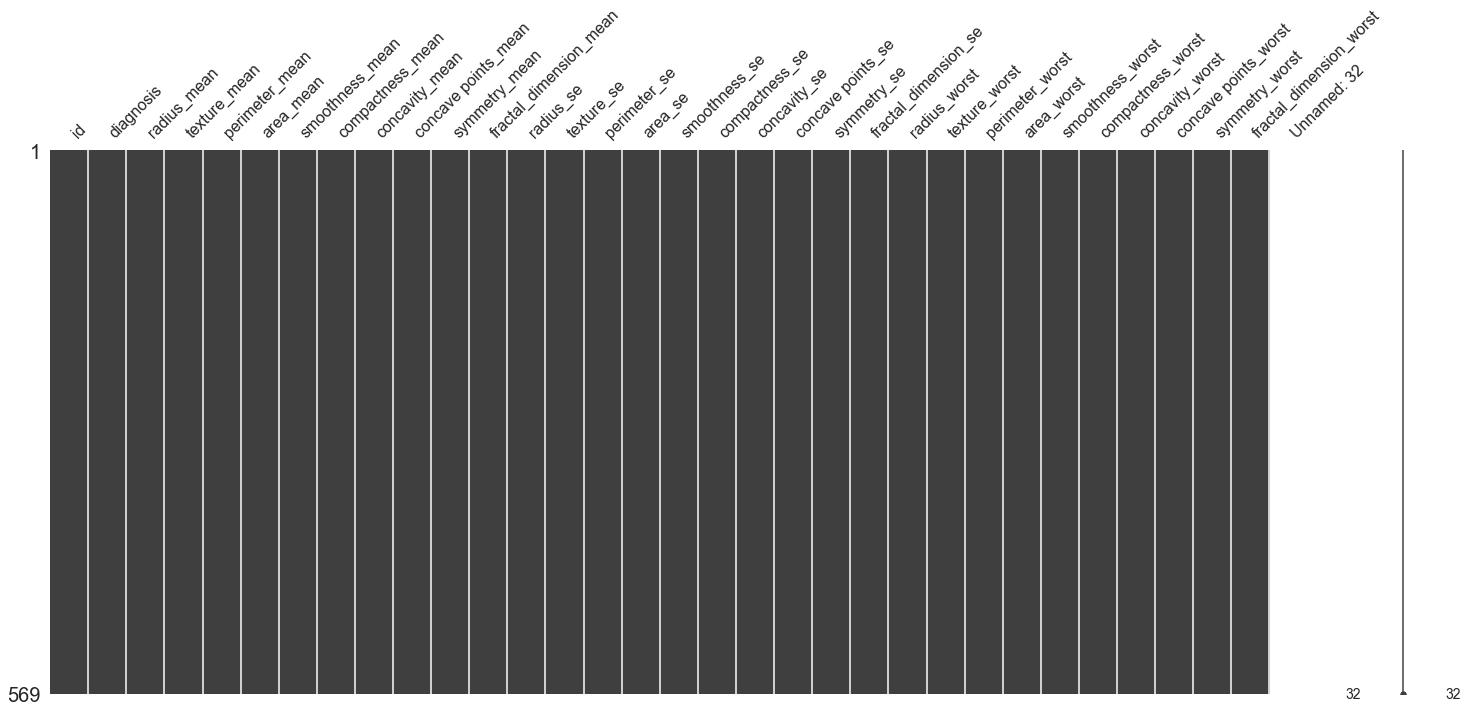

In [88]:
import missingno as msno
msno.matrix(data)

In [89]:
data.drop('Unnamed: 32',axis=1,inplace = True)

In [90]:
y = data["diagnosis"]
x = data.drop("diagnosis",axis=1)

In [91]:
#Feature Engineering
#feature selection
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [92]:
model = KNeighborsClassifier()
model.fit(x, y)

KNeighborsClassifier()

In [96]:
selector = SelectKBest(score_func = chi2,k=11)

In [97]:
x_new = selector.fit_transform(x,y)

In [104]:
ind = selector.get_support(indices=True)
print(ind)

[ 0  1  2  3  4 13 14 21 22 23 24]
